<a href="https://colab.research.google.com/github/adaa1999/Alumni-Web-Portal/blob/master/TrafficSignClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic_Sign_Classifier


In [0]:
#this link is  for getting the data from git bucket
!git clone https://njnitesh@bitbucket.org/njnitesh/traffic_sign_classifier_data.git

Cloning into 'traffic_sign_classifier_data'...
remote: Counting objects: 8, done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 1), reused 0 (delta 0)
Unpacking objects: 100% (8/8), done.


In [0]:
# to remove a directory
#!rm -r /content/traffic_sign_classifier_data

In [0]:
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import pickle
import pandas as pd
import random
import cv2

Using TensorFlow backend.


In [0]:
!ls traffic_sign_classifier_data

signnames.csv  test.p  train.p	valid.p


In [0]:
np.random.seed(0)

In [0]:
with open('traffic_sign_classifier_data/train.p','rb') as f:
  train_data=pickle.load(f)
with open('traffic_sign_classifier_data/valid.p','rb') as f:
  val_data=pickle.load(f)
with open('traffic_sign_classifier_data/test.p','rb') as f:
  test_data=pickle.load(f)  
  

In [0]:
type(train_data)

dict

In [0]:
train_data['features'].shape
#number of image(34799) or batch size,size of image(32*32),color layer of image

(34799, 32, 32, 3)

In [0]:
train_data['labels'].shape

(34799,)

In [0]:
x_train,y_train=train_data["features"],train_data["labels"]
x_val,y_val=val_data["features"],val_data["labels"]
x_test,y_test=test_data["features"],test_data["labels"]



In [0]:
data=pd.read_csv('traffic_sign_classifier_data/signnames.csv')

In [0]:
data.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [0]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [0]:
data.SignName.values

array(['Speed limit (20km/h)', 'Speed limit (30km/h)',
       'Speed limit (50km/h)', 'Speed limit (60km/h)',
       'Speed limit (70km/h)', 'Speed limit (80km/h)',
       'End of speed limit (80km/h)', 'Speed limit (100km/h)',
       'Speed limit (120km/h)', 'No passing',
       'No passing for vechiles over 3.5 metric tons',
       'Right-of-way at the next intersection', 'Priority road', 'Yield',
       'Stop', 'No vechiles', 'Vechiles over 3.5 metric tons prohibited',
       'No entry', 'General caution', 'Dangerous curve to the left',
       'Dangerous curve to the right', 'Double curve', 'Bumpy road',
       'Slippery road', 'Road narrows on the right', 'Road work',
       'Traffic signals', 'Pedestrians', 'Children crossing',
       'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing',
       'End of all speed and passing limits', 'Turn right ahead',
       'Turn left ahead', 'Ahead only', 'Go straight or right',
       'Go straight or left', 'Keep right', 'Keep le

([<matplotlib.axis.XTick at 0x7f3b3a5b60b8>,
 <a list of 43 Text xticklabel objects>)

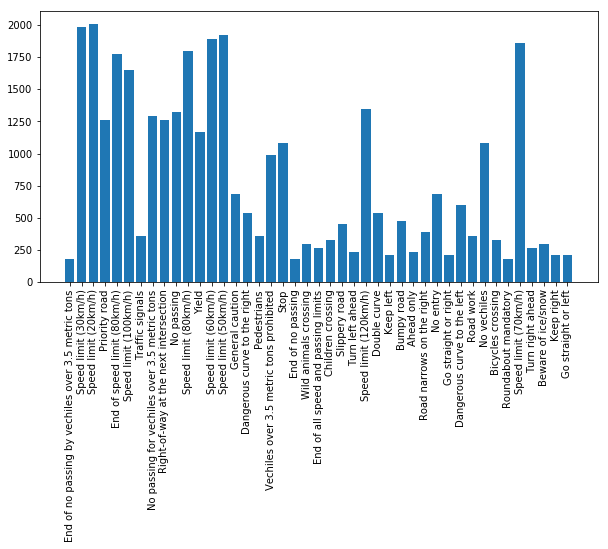

In [0]:
p=pd.Series(y_train).value_counts()
plt.figure(figsize=(10,5))

plt.bar(p.index,p.values)
plt.xticks(p.index,data.SignName,rotation=90)

In [0]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

<BarContainer object of 43 artists>

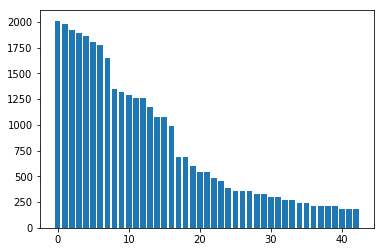

In [0]:
plt.bar(np.unique(y_train),p.values)

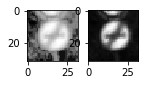

In [0]:
#equalize distribute the two colors in an image equally and then enhances the intensity of another a particular data that is to be observed
gray=cv2.cvtColor(x_train[1],cv2.COLOR_RGB2GRAY)
equalized=cv2.equalizeHist(gray)
fig,axis=plt.subplots(ncols=2,nrows=1,figsize=(2,1))
axis[0].imshow(equalized,cmap=plt.get_cmap("gray"))
axis[1].imshow(gray,cmap=plt.get_cmap("gray"))

In [0]:
def pre_pro(image):
  gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  equl=cv2.equalizeHist(gray)
  
  return equl/255

In [0]:
g=list(map(pre_pro,x_train))
e=list(map(pre_pro,x_test))
d=list(map(pre_pro,x_val))

In [0]:
type(g)

list

In [0]:

g[0]

array([[0.25490196, 0.1372549 , 0.1372549 , ..., 0.46666667, 0.42745098,
        0.42745098],
       [0.35686275, 0.1372549 , 0.1372549 , ..., 0.46666667, 0.42745098,
        0.42745098],
       [0.35686275, 0.1372549 , 0.1372549 , ..., 0.46666667, 0.42745098,
        0.42745098],
       ...,
       [0.1372549 , 0.25490196, 0.25490196, ..., 0.1372549 , 0.1372549 ,
        0.25490196],
       [0.04705882, 0.1372549 , 0.35686275, ..., 0.1372549 , 0.1372549 ,
        0.1372549 ],
       [0.1372549 , 0.25490196, 0.25490196, ..., 0.1372549 , 0.04705882,
        0.        ]])

In [0]:
g[0].shape

(32, 32)

In [0]:
nx_train=np.array(g)
nx_train=nx_train.reshape(-1,32,32,1)
nx_test=np.array(e)
nx_test=nx_test.reshape(-1,32,32,1)
nx_val=np.array(d)
nx_test=nx_test.reshape(-1,32,32,1)

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_val=to_categorical(y_val)

In [0]:
y_train.shape

(34799, 43)

In [0]:
nrow=43
ncol=10

In [0]:
def lenet_model():
    model=Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(32,32,1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation="relu"))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.7))
    model.add(Dense(nrow, activation="softmax"))
    model.compile(Adam(lr=0.001), loss="categorical_crossentropy", metrics=["accuracy"] )
    return model  

In [0]:
nx_val=nx_val.reshape(4410,32,32,1)

In [0]:
lenet=lenet_model()
lenet.summary()
history=lenet.fit(nx_train, y_train, epochs=50, validation_data=(nx_val, y_val), shuffle=1, verbose=1, batch_size=400)
#accuracy must be greater than validation accuracy to avoid overfitting

W0803 09:21:18.532829 139892470368128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 09:21:18.581385 139892470368128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 09:21:18.593680 139892470368128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 09:21:18.640575 139892470368128 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0803 09:21:18.661528 139892470368128 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 15)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               270500    
__________

Text(0.5, 0, 'epoch')

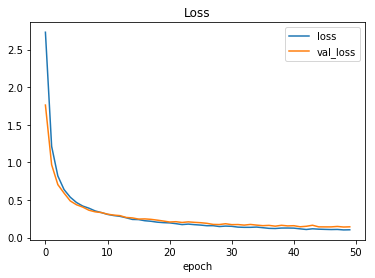

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

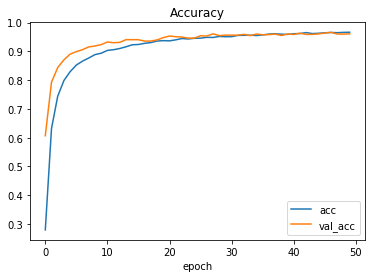

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [0]:
from PIL import Image
import io
import requests
import cv2 as cv
import numpy as np


In [0]:
url="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcShJSDAy5cQS7TJ4qZLPUjIU6-J53QtGtRgQCj2WiSn-MA1e1J4_g"
#url="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAPwv6gECC1owK3KoupsxmqDkXOdypM-v9BQvOiCw8JeLEe2L46w"
#url="https://cdn3.volusion.com/tnoys.cjerh/v/vspfiles/photos/0387-2.jpg?1531417703"
img=np.array(Image.open(io.BytesIO(requests.get(url,stream=True).content)))

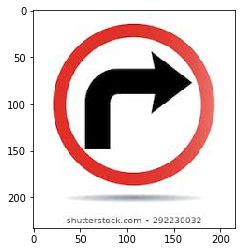

In [0]:
plt.imshow(img,cmap="gray")

In [0]:
img=cv.resize(img,(32,32))

In [0]:
img=pre_pro(img)

In [0]:
img=img.reshape([1,32,32,1])

In [0]:
lenet.predict_classes(img)

array([15])

In [0]:
data.values[15]

array([15, 'No vechiles'], dtype=object)